Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [149]:
airbnb<-read.csv('../data/airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
head(airbnb)

,ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,⋯,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,14712301,https://www.airbnb.com/rooms/14712301,2.017030e+13,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",none,,⋯,9,9,10,,,strict,1,0.34,"51.492474020220754,-0.18862840099442768","Host Has Profile Pic,Host Identity Verified"
2,12884849,https://www.airbnb.com/rooms/12884849,2.017030e+13,2017-03-05,Five bedroom house in Barnes,"Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children.","The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional and spacious bedrooms as well as shared bathroom. All bedrooms including the children's bedrooms have plenty of wardrobe space. House is basic but clean and fully functional.","Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children. The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional",none,Quiet residential street,⋯,10,10,9,,,moderate,2,0.76,"51.482004616612734,-0.23927746504041247","Host Has Profile Pic,Is Location Exact"
3,17524980,https://www.airbnb.com/rooms/17

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [150]:
library("dplyr")
library("ggplot2")

In [151]:
fulldata <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(fulldata)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
2,London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
3,London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
4,Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
5,Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389
6,Madrid,Private room,La Latina,2,1.0,1,1,20,861,1,10,91,40.40971,-3.7135612


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [171]:
df_madrid <- fulldata[fulldata$City == "Madrid",]
df_madrid <- df_madrid[df_madrid$Room.Type == "Entire home/apt",]
df_madrid <- df_madrid[!is.na(df_madrid$Neighbourhood), ]
df_madrid <- df_madrid[df_madrid$Neighbourhood != " ",]
df_madrid <- df_madrid[df_madrid$Neighbourhood != "",]
df_madrid = subset(df_madrid, select = -c(Room.Type, City) )
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
5,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
7,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
8,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
12,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
15,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [172]:
df_madrid$Square.Meters <- df_madrid$Square.Feet * 0.092903
head(df_madrid[,c('Square.Meters', 'Square.Feet')])

,Square.Meters,Square.Feet
,<dbl>,<int>
5,NA,NA
7,NA,NA
8,NA,NA
12,NA,NA
14,NA,NA
15,NA,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [173]:
numerador = sum(is.na(df_madrid$Square.Meters))
denominador = length(df_madrid$Square.Meters)
nosonNA = sum(!is.na(df_madrid$Square.Meters))
cat("Existen ", numerador, "filas con valor 'NA' y ", nosonNA, " filas con valores. \n")
cat("El total de filas del dataframe es --> ", denominador, ". \n")
porcentaje = round(100*numerador/denominador,2)
cat("Las filas con 'NA' representan el ", round(porcentaje,2), "% del total de filas en el dataframe.")

Existen  5254 filas con valor 'NA' y  347  filas con valores. 
El total de filas del dataframe es -->  5601 . 
Las filas con 'NA' representan el  93.8 % del total de filas en el dataframe.

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [174]:
tabla_nosonNA = table(df_madrid$Square.Meters)
nosonNA_0 = tabla_nosonNA[names (tabla_nosonNA) == 0]
cat("Existen en total ", nosonNA_0, "filas con valor igual a 0 en Square.Meters. \n")
cat("Esto de un total de ", nosonNA, "filas con valores diferentes a NA. \n")
porcentaje = round(100* nosonNA_0/nosonNA,2)
cat("El porcentaje de filas con valor '0' del total de filas que tienen valor distinto a NA es ", porcentaje, "%")

Existen en total  128 filas con valor igual a 0 en Square.Meters. 
Esto de un total de  347 filas con valores diferentes a NA. 
El porcentaje de filas con valor '0' del total de filas que tienen valor distinto a NA es  36.89 %

Reemplazar todos los 0m^2 por NA 

In [175]:
cat("Para comprobar el resultado, debo de tener ", numerador, " filas originales con 'NA' \n")
cat("MÁS el total de filas con valor '0', que es ", nosonNA_0, "\n \n")
df_madrid["Square.Meters"][df_madrid["Square.Meters"] == 0] <- NA
nuevo_denominador = sum(is.na(df_madrid$Square.Meters))
cat("Al cambiar los '0' por NA, el resultado que me da es ", nuevo_denominador, "por lo tanto")
if (nuevo_denominador == nosonNA_0 + numerador) {
    print("El cambio SI ha sido realizado de manera correcta!")
} else {print("El cambio NO se realizón de manera correcta!")}

Para comprobar el resultado, debo de tener  5254  filas originales con 'NA' 
MÁS el total de filas con valor '0', que es  128 
 
Al cambiar los '0' por NA, el resultado que me da es  5382 por lo tanto[1] "El cambio SI ha sido realizado de manera correcta!"


Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [176]:
df_madrid["Square.Meters"][df_madrid["Square.Meters"] < 20] <- NA
nuevo_denominador = sum(is.na(df_madrid$Square.Meters))
nuevo_denominador
df_madrid

[1] 5427

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
5,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
7,Malasaña,4,1.0,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
8,Palacio,8,3.0,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
12,La Latina,2,1.0,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA
15,Embajadores,3,1.0,0,2,60,NA,1,0,100,40.41085,-3.701099,NA
16,La Latina,2,1.0,0,1,45,NA,1,0,87,40.40812,-3.710367,NA
20,Embajadores,6,1.0,2,3,120,NA,6,30,100,40.41314,-3.705092,NA
21,Embajadores,4,1.0,0,2,50,NA,2,8,86,40.40988,-3.702840,NA


Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [181]:
#df_madrid <- subset(df_madrid, !is.na(df_madrid$Square.Meters))
#head(tabla_df_madrid)
Barrios <- c(unique(df_madrid$Neighbourhood))
Barrios
df2 <- df_madrid
for (i in Barrios) {
    num_barrios = nrow(subset(df_madrid, df_madrid$Neighbourhood == i))
    num_NA = nrow(subset(df_madrid, (df_madrid$Neighbourhood == i) & is.na(df_madrid$Square.Meters)))
    if (num_NA == num_barrios) {
        cat("El barrio ", i, " tiene ", num_barrios, " apartamentos. \n")
        cat("      Y TIENE --> ", num_NA, " Square.Meters con valor NA! \n")
        cat("------------------------> SE ELIMINA! \n \n")
        df2 <- subset(df2, df2$Neighbourhood != i)

    }
}

#if (tabla_df_madrid[i][0] == )
print("La tabla original era --> ")
nuevo_numerador = sum(is.na(df_madrid$Square.Meters))
##cat("Me quedan ", nuevo_denominador, " pisos con valor 'NA'. \n")
##nuevo_denominador = sum(!is.na(df_madrid$Square.Meters))
cat("Me quedan ", nuevo_numerador, " pisos con 'NA'. \n")
cat("Y en total, ", length(df_madrid$Square.Meters), " valores. \n")
print("Al QUITAR los barrios que solo tienen NA, reduzco el dataframe así --> ")
print("")
nuevo_denominador = sum(is.na(df2$Square.Meters))
##cat("Me quedan ", nuevo_denominador, " pisos con valor 'NA'. \n")
##nuevo_denominador = sum(!is.na(df_madrid$Square.Meters))
cat("Me quedan ", nuevo_denominador, " pisos con 'NA'. \n")
cat("Y en total, ", length(df2$Square.Meters), " valores. \n")
df2

[1] "Palacio"             "Malasaña"            "La Latina"          
 [4] "Embajadores"         "Cortes"              "Justicia"           
 [7] "Sol"                 "Ciudad Lineal"       "Hortaleza"          
[10] "Villaverde"          "Arapiles"            "Trafalgar"          
[13] "La Chopera"          "Legazpi"             "Palos do Moguer"    
[16] "Prosperidad"         "Hispanoamérica"      "Nueva España"       
[19] "Castilla"            "Bellas Vistas"       "Cuatro Caminos"     
[22] "Almenara"            "Valdeacederas"       "Guindalera"         
[25] "Lista"               "Castellana"          "El Viso"            
[28] "Recoletos"           "Goya"                "Fuente del Berro"   
[31] "Pacifico"            "Adelfas"             "Ibiza"              
[34] "Jerónimos"           "Almagro"             "Rios Rosas"         
[37] "Argüelles"           "Aluche"              "Puente de Vallecas" 
[40] "Carabanchel"         "Moratalaz"           "Vicálvaro"          
[43] "San Blas"            "Barajas"             "Estrella"           
[46] "Usera"               "Gaztambide"          "Chamberí"           
[49] "Imperial"            "Acacias"             "Atocha"             
[52] "Delicias"            "Ciudad Jardin"       "El Tréntaiseis"     
[55] "Fuencarral-el Pardo" "Castillejos"         "Vallehermosa"       
[58] "Berruguete"          "Villa de Vallecas"   "Retiro"             
[61] "Tetuán"              "Moncloa"             "Centro"             
[64] "Fuencarral-El Pardo" "Arganzuela"

El barrio  Hortaleza  tiene  41  apartamentos. 
      Y TIENE -->  41  Square.Meters con valor NA! 
------------------------> SE ELIMINA! 
 
El barrio  Villaverde  tiene  16  apartamentos. 
      Y TIENE -->  16  Square.Meters con valor NA! 
------------------------> SE ELIMINA! 
 
El barrio  La Chopera  tiene  22  apartamentos. 
      Y TIENE -->  22  Square.Meters con valor NA! 
------------------------> SE ELIMINA! 
 
El barrio  Legazpi  tiene  12  apartamentos. 
      Y TIENE -->  12  Square.Meters con valor NA! 
------------------------> SE ELIMINA! 
 
El barrio  Prosperidad  tiene  39  apartamentos. 
      Y TIENE -->  39  Square.Meters con valor NA! 
------------------------> SE ELIMINA! 
 
El barrio  Hispanoamérica  tiene  28  apartamentos. 
      Y TIENE -->  28  Square.Meters con valor NA! 
------------------------> SE ELIMINA! 
 
El barrio  Nueva España  tiene  26  apartamentos. 
      Y TIENE -->  26  Square.Meters con valor NA! 
------------------------> SE ELIMINA! 
 
El 

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
5,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
7,Malasaña,4,1.0,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
8,Palacio,8,3.0,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
12,La Latina,2,1.0,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA
15,Embajadores,3,1.0,0,2,60,NA,1,0,100,40.41085,-3.701099,NA
16,La Latina,2,1.0,0,1,45,NA,1,0,87,40.40812,-3.710367,NA
20,Embajadores,6,1.0,2,3,120,NA,6,30,100,40.41314,-3.705092,NA
21,Embajadores,4,1.0,0,2,50,NA,2,8,86,40.40988,-3.702840,NA


El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

In [182]:
install.packages(c('ggplot2'), repos='https://cran.rstudio.com/')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vctrs’




In [183]:
library(ggplot2)

In [192]:
df_madrid <- df2

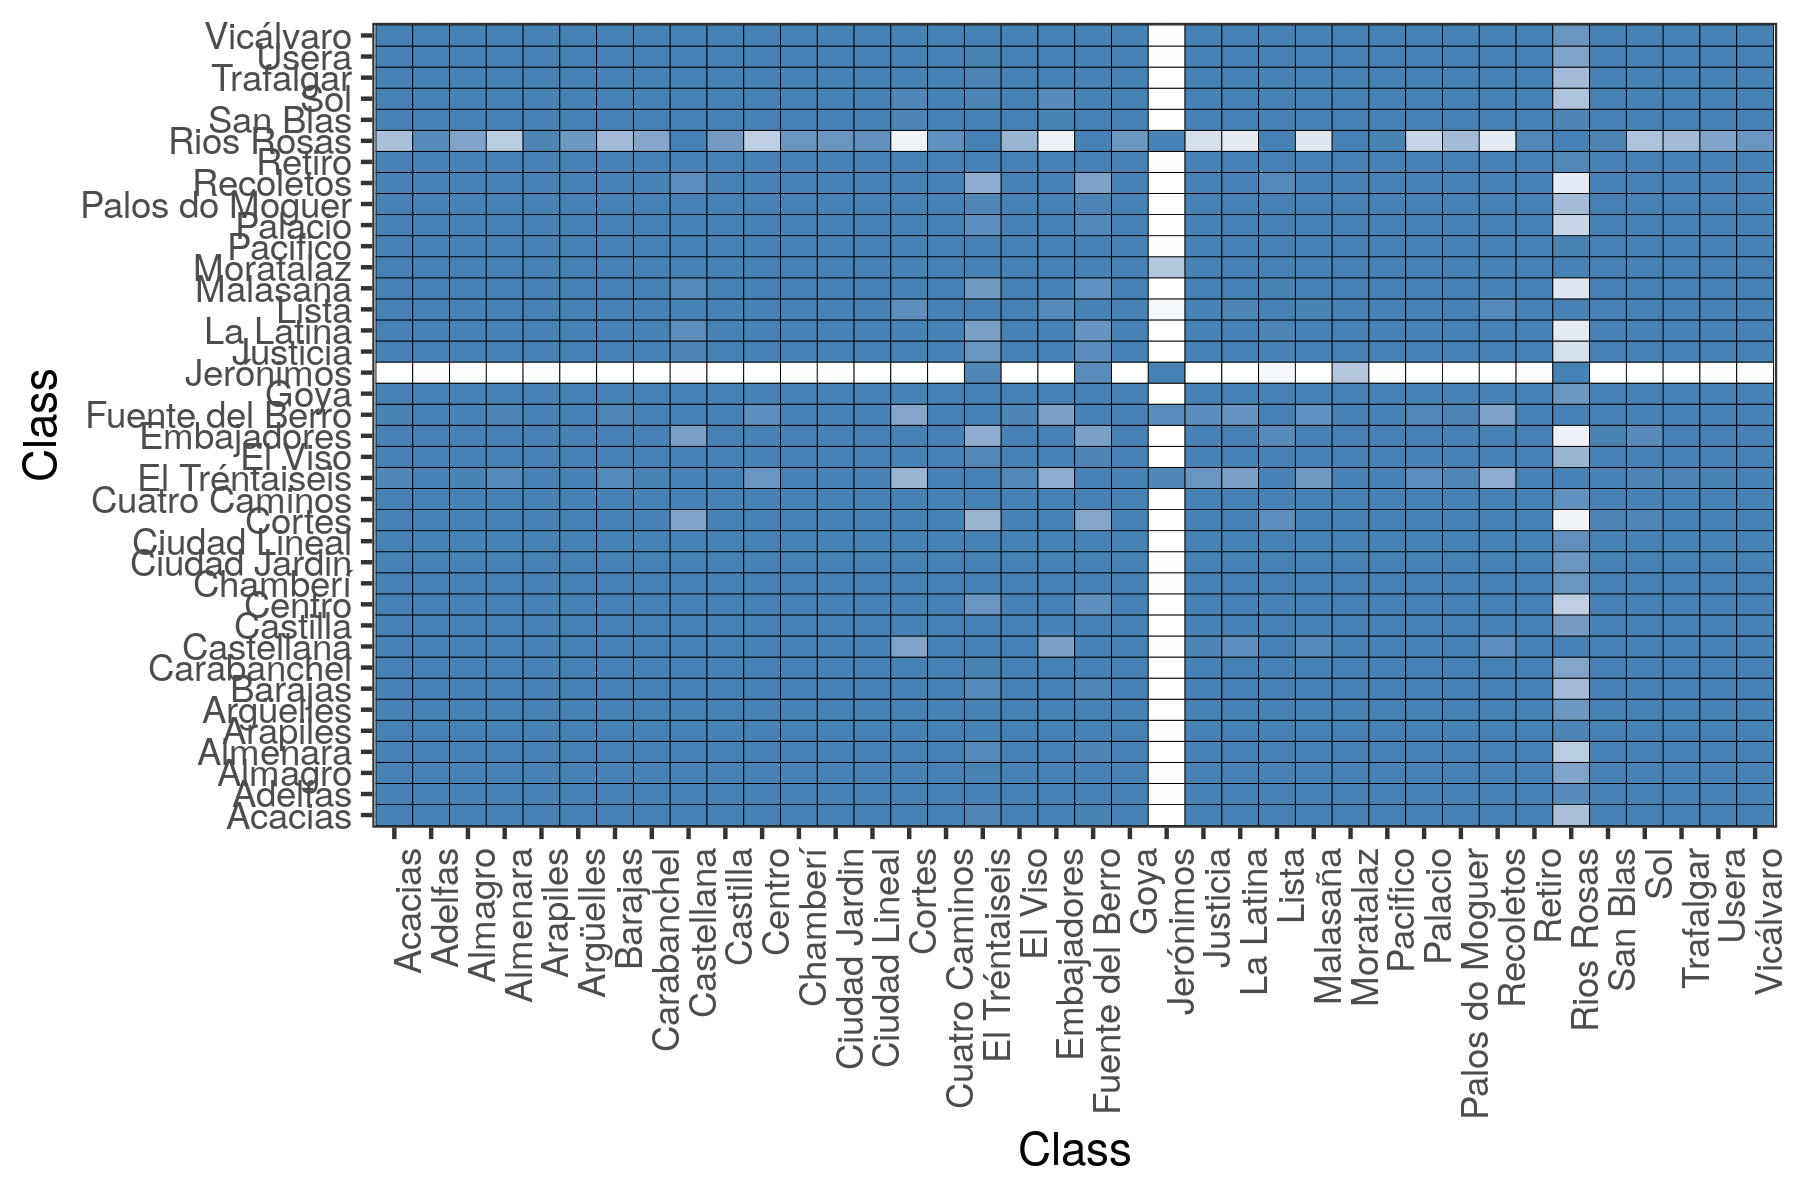

In [219]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [188]:
library (dendextend)

In [220]:
summary(dfResm)

        Var1             Var2          value       
 Acacias  :  38   Acacias  :  38   Min.   :0.0000  
 Adelfas  :  38   Adelfas  :  38   1st Qu.:1.0000  
 Almagro  :  38   Almagro  :  38   Median :1.0000  
 Almenara :  38   Almenara :  38   Mean   :0.9292  
 Arapiles :  38   Arapiles :  38   3rd Qu.:1.0000  
 Argüelles:  38   Argüelles:  38   Max.   :1.0000  
 (Other)  :1216   (Other)  :1216                   

 'dist' num [1:703] 0.426 0.22 0.11 0.479 0.319 ...
 - attr(*, "Size")= int 38
 - attr(*, "Labels")= chr [1:38] "Acacias" "Adelfas" "Almagro" "Almenara" ...
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = as.dist(1 - resm))


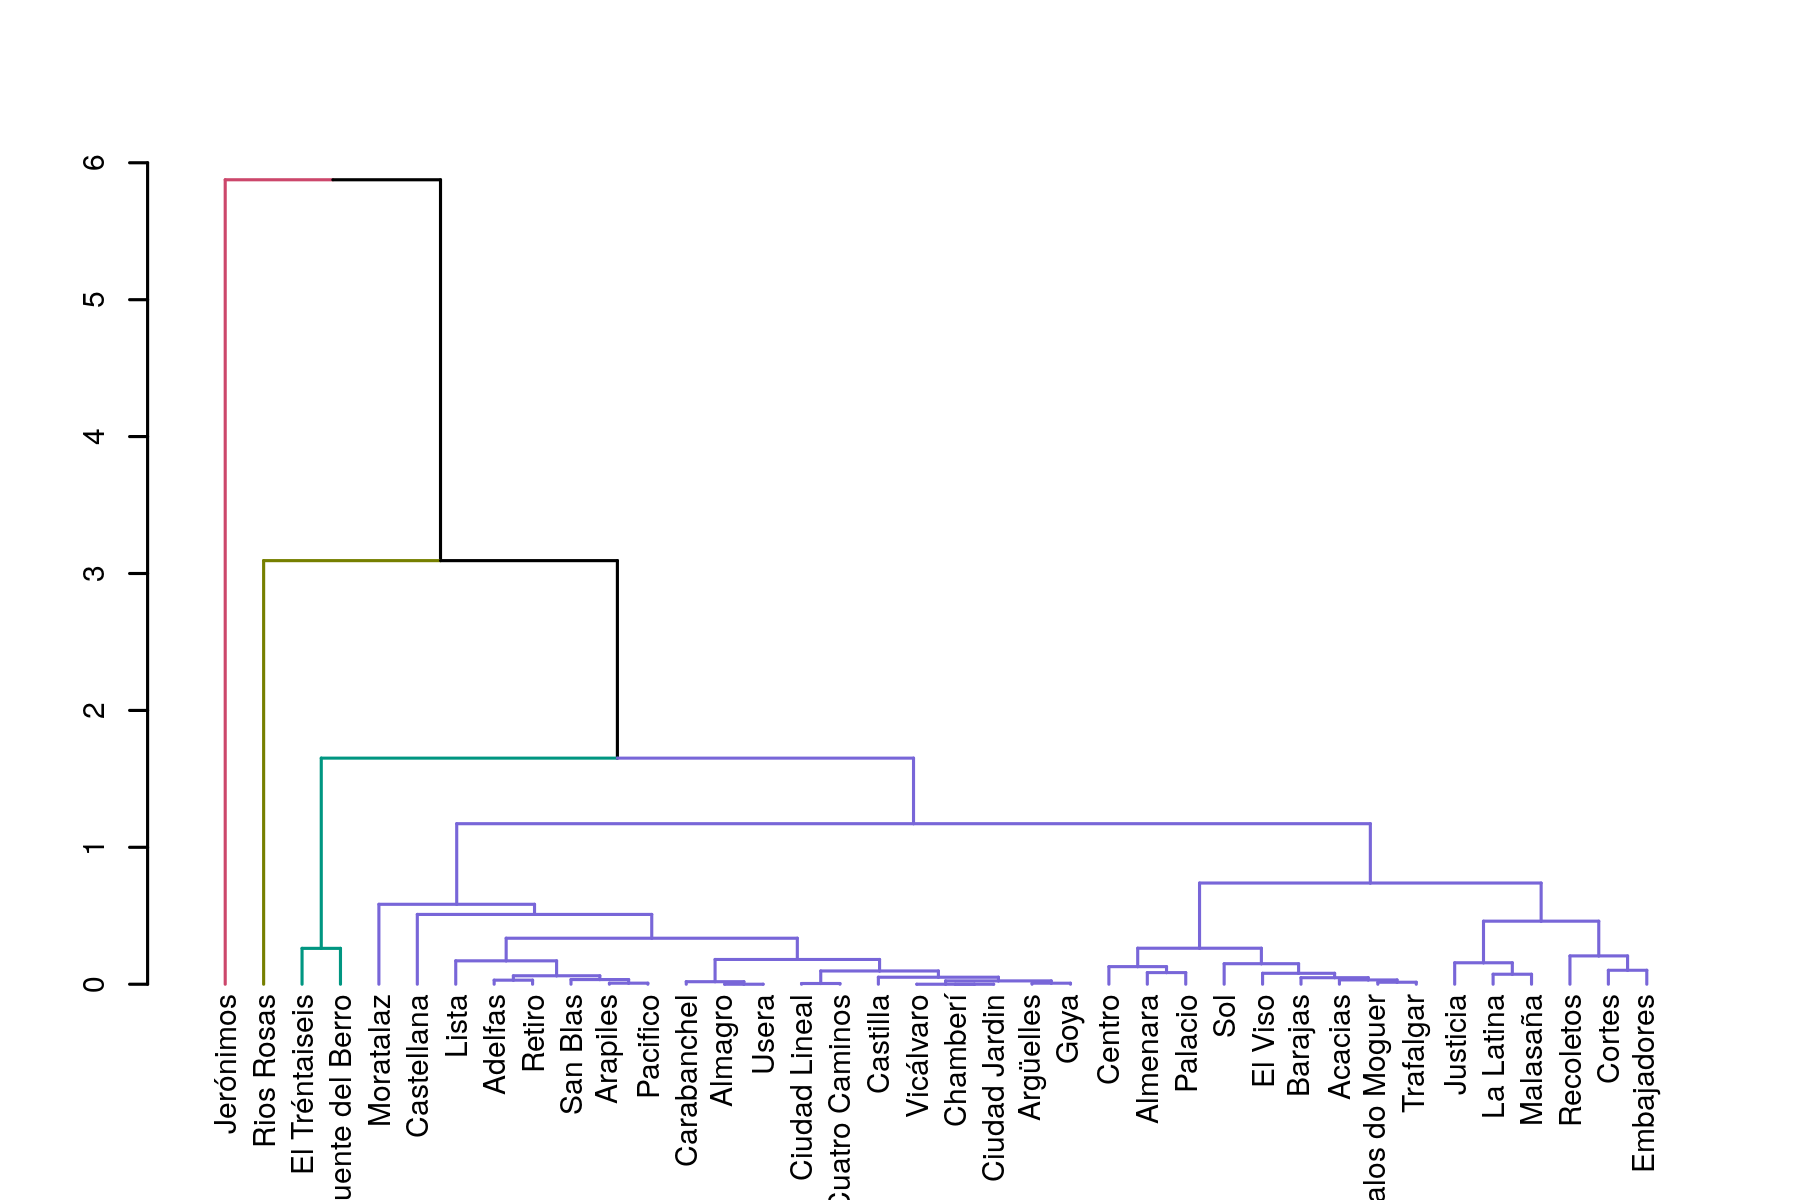

In [231]:
dfResm.dist <- dist(as.dist(1 - resm))
str(dfResm.dist)
dfResm.tree <- hclust(dfResm.dist)
dfResm.dend <- as.dendrogram(dfResm.tree)
#clusters <- cutree(dfResm.dend, k=10)
par(cex=0.6)
plot(color_branches(dfResm.dend, k=4))

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [233]:
library(dplyr)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?